### 1. Supervised, Semi-Supervised, and Unsupervised Learning

(a)
Download the Breast Cancer Wisconsin (Diagnostic) Data Set from:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+
%28Diagnostic%29
. Download the data in
https://archive.ics.uci.edu/ml/
machine-learning-databases/breast-cancer-wisconsin/wdbc.data
, which
has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has
two output classes

In [3]:
import warnings
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
)
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
import os
import csv


In [4]:
#1(a)
overall_path = os.getcwd()
new_path = os.path.dirname(overall_path)
data_path = os.path.join(new_path, 'data', 'wdbc', 'wdbc.data')

col_name = [
    'ID', 'Diagnosis', 
    'Radius_mean', 'Texture_mean', 'Perimeter_mean', 'Area_mean', 
    'Smoothness_mean', 'Compactness_mean', 'Concavity_mean', 
    'Concave_points_mean', 'Symmetry_mean', 'Fractal_dimension_mean',
    'Radius_se', 'Texture_se', 'Perimeter_se', 'Area_se', 
    'Smoothness_se', 'Compactness_se', 'Concavity_se', 
    'Concave_points_se', 'Symmetry_se', 'Fractal_dimension_se',
    'Radius_worst', 'Texture_worst', 'Perimeter_worst', 'Area_worst',
    'Smoothness_worst', 'Compactness_worst', 'Concavity_worst', 
    'Concave_points_worst', 'Symmetry_worst', 'Fractal_dimension_worst'
]

wdbc = pd.read_csv(data_path, header=None, names=col_name)
wdbc

,ID,Diagnosis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_points_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave_points_worst,Symmetry_worst,Fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
wdbc["Diagnosis"].value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [25]:
X = wdbc.iloc[:, 2:]
y = np.where(wdbc.iloc[:, 1] == 'M', 1, 0)
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

### i) Supervised Learning:
Train an
L
1
-penalized SVM to classify the data.
Use 5 fold cross validation to choose the penalty parameter. Use normalized
data. Report the average accuracy, precision, recall,
F
1
-score, and AUC, for
both training and test sets over your
M
runs. Plot the ROC and report the
confusion matrix for training and testing in one of the runs

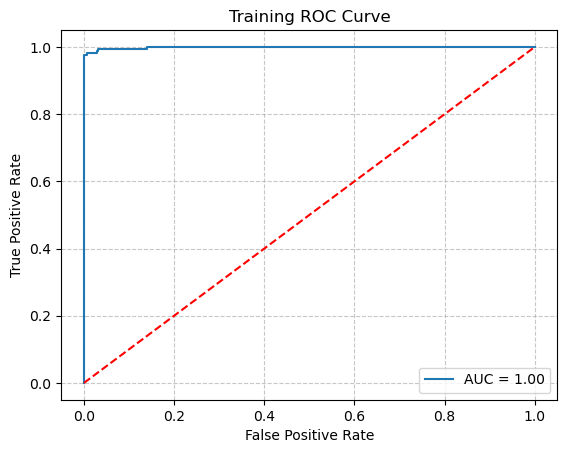

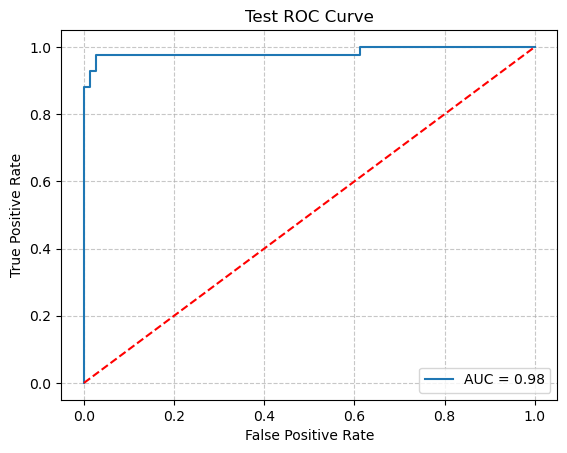

({'confusion_matrix': array([[284,   1],
         [  4, 166]]),
  'accuracy': 0.989,
  'precision': 0.994,
  'recall': 0.9765,
  'f1_score': 0.9852,
  'auc': 0.9988},
 {'confusion_matrix': array([[66,  6],
         [ 1, 41]]),
  'accuracy': 0.9386,
  'precision': 0.8723,
  'recall': 0.9762,
  'f1_score': 0.9213,
  'auc': 0.9835})

In [8]:
def train_svm(X_train, y_train, X_test, y_test, plot_title = False, plot = False):
    model = LinearSVC(penalty="l1", dual=False, max_iter=50000)
    param_grid = {"C": [0.01, 0.1, 1, 10, 100]}
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_train_pred = best_model.predict(X_train)
    y_train_scores = best_model.decision_function(X_train)
    y_test_pred = best_model.predict(X_test)
    y_test_scores = best_model.decision_function(X_test)

    train_metrics = evaluate_performance(
        y_train, y_train_pred, y_train_scores, plot_title="Training ROC Curve", plot=plot
    )
    test_metrics = evaluate_performance(
        y_test, y_test_pred, y_test_scores, plot_title="Test ROC Curve", plot=plot
    )
    return train_metrics, test_metrics

def evaluate_performance(y_true, y_pred, scores=None, plot_title=None, plot=False):
    confusion = confusion_matrix(y_true, y_pred)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="binary")
    recall = recall_score(y_true, y_pred, average="binary")
    f1 = f1_score(y_true, y_pred, average="binary")

    auc = None 
    if scores is not None:
        auc = roc_auc_score(y_true, scores)
        
        if plot:
            fpr, tpr, _ = roc_curve(y_true, scores)
            plt.figure()
            plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
            plt.plot([0, 1], [0, 1], linestyle="--", color="red")
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title(plot_title or "ROC Curve")
            plt.legend(loc="lower right")
            plt.grid(True, linestyle="--", alpha=0.7)
            plt.show()

    return {
        "confusion_matrix": confusion,
        "accuracy": round(accuracy, 4),
        "precision": round(precision, 4),
        "recall": round(recall, 4),
        "f1_score": round(f1, 4),
        "auc": round(auc, 4) if auc is not None else None, 
    }


train_svm(X_train, y_train, X_test, y_test, plot = True)

### ii) Semi-Supervised Learning/ Self-training:
select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

A. Train an
L
1
-penalized SVM to classify the labeled data Use normalized
data. Choose the penalty parameter using 5 fold cross validation.

B. Find the unlabeled data point that is the farthest to the decision boundary
of the SVM. Let the SVM label it (ignore its true label), and add it to
the labeled data, and retrain the SVM. Continue this process until all
unlabeled data are used. Test the final SVM on the test data andthe
average accuracy, precision, recall,
F
1
-score, and AUC, for both training
and test sets over your
M
runs. Plot the ROC and report the confusion
matrix for training and testing in one of the runs.


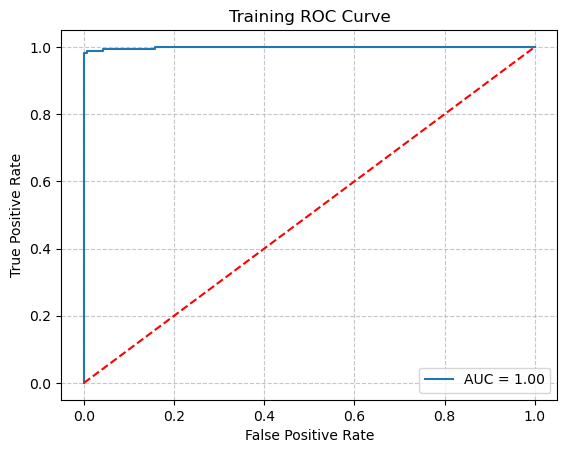

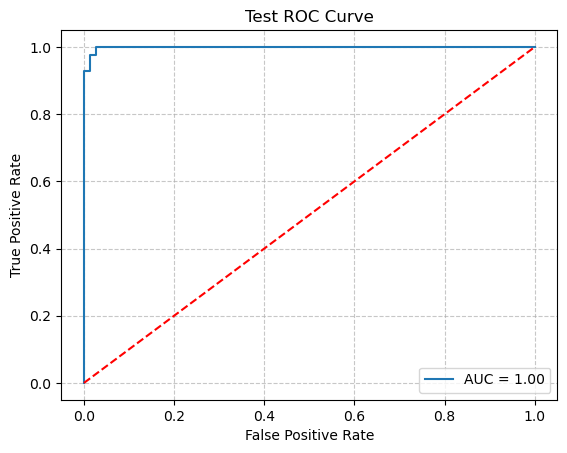

({'confusion_matrix': array([[290,   0],
         [  3, 162]]),
  'accuracy': 0.9934,
  'precision': 1.0,
  'recall': 0.9818,
  'f1_score': 0.9908,
  'auc': 0.9987},
 {'confusion_matrix': array([[71,  1],
         [ 3, 39]]),
  'accuracy': 0.9649,
  'precision': 0.975,
  'recall': 0.9286,
  'f1_score': 0.9512,
  'auc': 0.9987})

In [10]:
def semi_supervised_svm(X_train, y_train, X_test, y_test, plot_title = False, plot = False):
    X_labeled, X_unlabeled, y_labeled, _ = train_test_split(
        X_train, y_train, test_size=0.5, stratify=y_train)

    scaler = StandardScaler()
    X_labeled = scaler.fit_transform(X_labeled)
    X_unlabeled = scaler.transform(X_unlabeled)
    X_test = scaler.transform(X_test)

    model = LinearSVC(penalty="l1", dual=False, max_iter=50000)
    param_grid = {"C": [0.01, 0.1, 1, 10, 100]}
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)

    while len(X_unlabeled) > 0:
        grid_search.fit(X_labeled, y_labeled)
        best_model = grid_search.best_estimator_

        distances = best_model.decision_function(X_unlabeled)
        farthest_idx = np.argmax(np.abs(distances))

        new_sample = X_unlabeled[farthest_idx].reshape(1, -1)
        new_label = best_model.predict(new_sample)[0]
        X_labeled = np.vstack([X_labeled, new_sample])
        y_labeled = np.append(y_labeled, new_label)
        X_unlabeled = np.delete(X_unlabeled, farthest_idx, axis=0)

    y_train_pred = best_model.predict(X_labeled)
    y_train_scores = best_model.decision_function(X_labeled)
    y_test_pred = best_model.predict(X_test)
    y_test_scores = best_model.decision_function(X_test)

    train_metrics = evaluate_performance(
        y_labeled, y_train_pred, y_train_scores, plot_title="Training ROC Curve", plot=plot
    )
    test_metrics = evaluate_performance(
        y_test, y_test_pred, y_test_scores, plot_title="Test ROC Curve", plot=plot
    )

    return train_metrics, test_metrics

semi_supervised_svm(X_train, y_train, X_test, y_test, plot = True)

### iii) Unsupervised Learning:
Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2

A. Run the k-means algorithm multiple times. Make sure that you initialize
the algoritm randomly. How do you make sure that the algorithm was
not trapped in a local minimum?

B. Compute the centers of the two clusters and find the closest 30 data
points to each center. Read the true labels of those 30 data points and
take a majority poll within them. The majority poll becomes the label
predicted by k-means for the members of each cluster. Then compare the
labels provided by k-means with the true labels of the training data and
report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.

C. Classify test data based on their proximity to the centers of the clusters.Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.


Training Metrics:
Accuracy: 0.9077, Precision: 0.9103, Recall: 0.8353, F1-Score: 0.8712, AUC: 0.8931

Test Metrics:
Accuracy: 0.9035, Precision: 0.8974, Recall: 0.8333, F1-Score: 0.8642, AUC: 0.8889



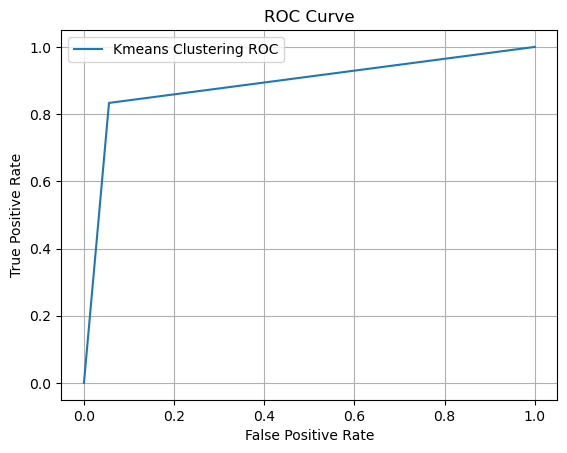

Confusion Matrix:
 [[68  4]
 [ 7 35]]


In [12]:
def clustering_analysis(X_train, y_train, X_test, y_test, method='kmeans', M=30):
    all_train_results, all_test_results = [], []

    for _ in range(M):
        if method == 'kmeans':
            model = KMeans(n_clusters=2, n_init=10)
            train_labels = model.fit_predict(X_train)
            cluster_centers = model.cluster_centers_
        elif method == 'spectral':
            model = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1, assign_labels='kmeans')
            train_labels = model.fit_predict(X_train)
            cluster_centers = None

        cluster_votes = []
        for cluster_idx in range(2):
            cluster_indices = np.where(train_labels == cluster_idx)[0]
            if len(cluster_indices) > 0:
                true_labels = y_train[cluster_indices]
                majority_label = np.argmax(np.bincount(true_labels))
                cluster_votes.append(majority_label)

        train_predictions = np.array([cluster_votes[label] for label in train_labels])
        train_accuracy = accuracy_score(y_train, train_predictions)
        train_precision = precision_score(y_train, train_predictions)
        train_recall = recall_score(y_train, train_predictions)
        train_f1 = f1_score(y_train, train_predictions)
        train_auc = roc_auc_score(y_train, train_predictions)
        all_train_results.append([train_accuracy, train_precision, train_recall, train_f1, train_auc])

        if method == 'kmeans':
            test_predictions = []
            for point in X_test:
                distances = [np.linalg.norm(point - center) for center in cluster_centers]
                predicted_label = cluster_votes[np.argmin(distances)]
                test_predictions.append(predicted_label)

        elif method == 'spectral':
            test_predictions = []
            for point in X_test:
                distances = [np.linalg.norm(point - X_train[idx]) for idx in range(len(X_train))]
                closest_idx = np.argmin(distances)
                predicted_label = cluster_votes[train_labels[closest_idx]]
                test_predictions.append(predicted_label)

        test_predictions = np.array(test_predictions)
        assert len(test_predictions) == len(y_test), f"Mismatch: test_predictions={len(test_predictions)}, y_test={len(y_test)}"

        test_accuracy = accuracy_score(y_test, test_predictions)
        test_precision = precision_score(y_test, test_predictions)
        test_recall = recall_score(y_test, test_predictions)
        test_f1 = f1_score(y_test, test_predictions)
        test_auc = roc_auc_score(y_test, test_predictions)
        all_test_results.append([test_accuracy, test_precision, test_recall, test_f1, test_auc])

    avg_train_results = np.mean(all_train_results, axis=0)
    avg_test_results = np.mean(all_test_results, axis=0)

    print("Training Metrics:")
    print(f"Accuracy: {avg_train_results[0]:.4f}, Precision: {avg_train_results[1]:.4f}, "
          f"Recall: {avg_train_results[2]:.4f}, F1-Score: {avg_train_results[3]:.4f}, AUC: {avg_train_results[4]:.4f}\n")

    print("Test Metrics:")
    print(f"Accuracy: {avg_test_results[0]:.4f}, Precision: {avg_test_results[1]:.4f}, "
          f"Recall: {avg_test_results[2]:.4f}, F1-Score: {avg_test_results[3]:.4f}, AUC: {avg_test_results[4]:.4f}\n")

    fpr, tpr, _ = roc_curve(y_test, test_predictions)
    plt.plot(fpr, tpr, label=f"{method.capitalize()} Clustering ROC")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid()
    plt.show()

    print("Confusion Matrix:\n", confusion_matrix(y_test, test_predictions))
    return avg_test_results[0]

kmeans = clustering_analysis(X_train, y_train, X_test, y_test, method='kmeans', M=30)

### iv) Spectral Clustering
: Repeat 1(b)iii using spectral clustering
, which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the
same balance as the one in original data set (if the positive class has p and the negative class has
n samples, the two clusters must have p and n members).
Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use
fit - predict method.

Training Metrics:
Accuracy: 0.6286, Precision: 1.0000, Recall: 0.0059, F1-Score: 0.0117, AUC: 0.5029

Test Metrics:
Accuracy: 0.6404, Precision: 1.0000, Recall: 0.0238, F1-Score: 0.0465, AUC: 0.5119



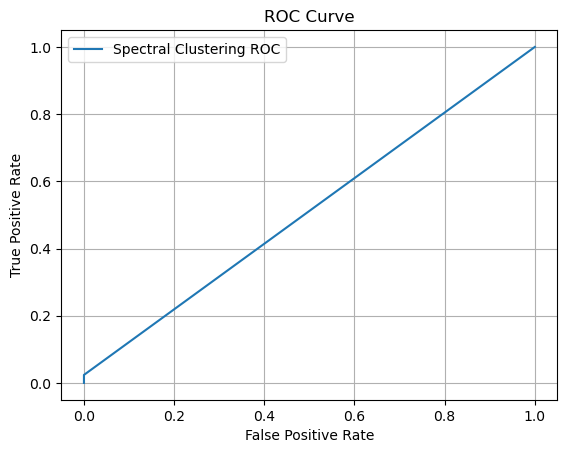

Confusion Matrix:
 [[72  0]
 [41  1]]


In [27]:
Spectral = clustering_analysis(X_train, y_train, X_test, y_test, method='spectral', M=30)

I wrote a function to find a gamma for which the two clutsres have the same balance as the one in original data set, I used 5 hours to run this function and the result I got was a strignt line for roc curve, 
The accuracy is very low, and from the Confusion Matrix, we can see that there are 42 False Negatives in total, which means that the model performs very poorly in classifying the positive class (labeled as 1), and it classifies all the positive classes into the wrong class. So I judged that it is not necessary to find a gamma for which the two clutsres have the
#same balance, so I just used gamma = 1


```python
def find_optimal_gamma(X, y):
    positive_count = sum(y == 1)
    negative_count = sum(y == 0)
    target_ratio = positive_count / negative_count
    gammas = np.linspace(0.1, 5, 50)
    for gamma in gammas:
        spectral = SpectralClustering(
            n_clusters=2, affinity='rbf', gamma=gamma, assign_labels='kmeans'
        )
        cluster_labels = spectral.fit_predict(X)
        cluster_sizes = np.bincount(cluster_labels)
        if len(cluster_sizes) == 2:  
            max_cluster = max(cluster_sizes)
            min_cluster = min(cluster_sizes)
            ratio = max_cluster / min_cluster
            if abs(ratio - target_ratio) < 0.1: 
                return gamma
    return 1  

### v) One can expect that supervised learning on the full data set works better than
semi-supervised learning with half of the data set labeled.One can expect that
unsupervised learning underperforms in such situations. Compare the results
you obtained by those methods.

In [17]:
def run_multiple_times(function, *args, repetitions=30):
    all_test_results = []

    for _ in range(repetitions):
        _, test_metrics = function(*args)
        all_test_results.append(test_metrics)
    
    mean_test_results = {}
    
    for key in all_test_results[0].keys():
        mean_test_results[key] = np.mean([result[key] for result in all_test_results])
    
    return mean_test_results


semi_supervised_results = run_multiple_times(semi_supervised_svm, X_train, y_train, X_test, y_test, repetitions=30)
supervised_results = run_multiple_times(train_svm, X_train, y_train, X_test, y_test, repetitions=30)

semi_accuracy = semi_supervised_results["accuracy"]
supervised_accuracy = supervised_results["accuracy"]

print("Semi-supervised Accuracy:", semi_accuracy)
print("Supervised Accuracy:", supervised_accuracy)
print("Unsupervised Kmeans Accuracy:", kmeans)
print("Unsupervised Spectral Accuracy:", Spectral)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Semi-supervised Accuracy: 0.9543900000000003
Supervised Accuracy: 0.9386000000000002
Unsupervised Kmeans Accuracy: 0.9035087719298251
Unsupervised Spectral Accuracy: 0.6315789473684211


In [40]:
data_path2 = os.path.join(new_path, 'data', 'wdbc', 'data_banknote_authentication.txt')

data = pd.read_csv(data_path2, sep=',', header=None)
print(data.head())
data.shape

         0       1       2        3  4
0  3.62160  8.6661 -2.8073 -0.44699  0
1  4.54590  8.1674 -2.4586 -1.46210  0
2  3.86600 -2.6383  1.9242  0.10645  0
3  3.45660  9.5228 -4.0112 -3.59440  0
4  0.32924 -4.4552  4.5718 -0.98880  0


(1372, 5)

In [42]:
shuffled_data = data.sample(frac=1, random_state=42).reset_index(drop=True)

train_data = shuffled_data.iloc[:900]
test_data = shuffled_data.iloc[900:]

X_train, y_train = train_data.iloc[:, :-1], train_data.iloc[:, -1]
X_test, y_test = test_data.iloc[:, :-1], test_data.iloc[:, -1]

class_counts = data.iloc[:, -1].value_counts()

### Active Learning Using Support Vector Machines
(a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication
. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem

(b) Repeat each of the following two procedures 50 times. You will have 50 errors for
90 SVMs per each procedure.

i. Train a SVM with a pool of 10 randomly selected data points from the training
set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation. Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

ii. Train a SVM with a pool of 10 randomly selected data points from the training
set 5 using linear kernel and L1 penalty. Select the parameters of the SVM
with 5-fold cross validation. Choose the 10 closest data points in the training
set to the hyperplane of the SVM and add them to the pool. Do not replace
the samples back into the training set. Train a new SVM using the pool.
Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

(c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i
and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot
average test error versus number of training instances for both active and passive
learners on the same figure and report your conclusions. Here, you are actually
obtaining a learning curve by Monte-Carlo simulation.

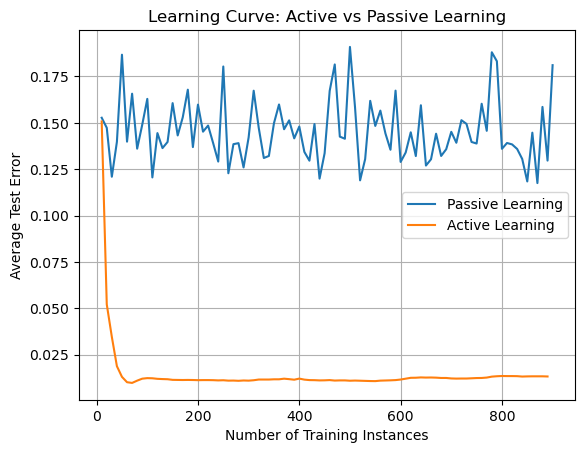

In [74]:
warnings.filterwarnings("ignore", category=FitFailedWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

def monte_carlo_svm(X_train, y_train, X_test, y_test, method="passive", repetitions=50):
    all_errors = []

    for _ in range(repetitions):
        test_errors = []

        if method == "active":
            pool_X = X_train.sample(n=10, random_state=None)
            pool_y = y_train.loc[pool_X.index]
            remaining_X = X_train.drop(pool_X.index)
            remaining_y = y_train.drop(pool_y.index)

            while len(pool_X) < 900:
                model = LinearSVC(penalty='l1', dual=False, max_iter=10000)
                param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
                grid = GridSearchCV(model, param_grid, cv=5, error_score=np.nan)
                grid.fit(pool_X, pool_y)

                best_model = grid.best_estimator_
                y_pred = best_model.predict(X_test)
                test_error = 1 - accuracy_score(y_test, y_pred)
                test_errors.append(test_error)

                if len(remaining_X) == 0:
                    break

                distances = best_model.decision_function(remaining_X)
                near_idx = np.argsort(np.abs(distances))[:10]

                close_X = remaining_X.iloc[near_idx]
                close_y = remaining_y.iloc[near_idx]

                pool_X = pd.concat([pool_X, close_X])
                pool_y = pd.concat([pool_y, close_y])
                remaining_X = remaining_X.drop(close_X.index)
                remaining_y = remaining_y.drop(close_y.index)

        elif method == "passive":
            remaining_X = X_train.copy()
            remaining_y = y_train.copy()
            n_instances = 10

            while n_instances <= 900:
                random_idx = np.random.choice(remaining_X.index, size=10, replace=False)
                pool_X = remaining_X.loc[random_idx]
                pool_y = remaining_y.loc[random_idx]

                if len(np.unique(pool_y)) > 1: 
                    remaining_X = remaining_X.drop(random_idx)
                    remaining_y = remaining_y.drop(random_idx)

                    model = LinearSVC(penalty='l1', dual=False, max_iter=10000)
                    param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
                    grid = GridSearchCV(model, param_grid, cv=5, error_score=np.nan)
                    grid.fit(pool_X, pool_y)

                    best_model = grid.best_estimator_
                    y_pred = best_model.predict(X_test)
                    test_error = 1 - accuracy_score(y_test, y_pred)
                    test_errors.append(test_error)

                    n_instances += 10 

        all_errors.append(test_errors)

    mean_errors = np.nanmean(all_errors, axis=0)
    return mean_errors

passive_errors = monte_carlo_svm(X_train, y_train, X_test, y_test, method="passive", repetitions=50)
active_errors = monte_carlo_svm(X_train, y_train, X_test, y_test, method="active", repetitions=50)

sizes = np.arange(10, 901, 10)

if len(active_errors) < len(sizes):
    active_errors = np.pad(active_errors, (0, len(sizes) - len(active_errors)), constant_values=np.nan)

plt.plot(sizes, passive_errors, label="Passive Learning")
plt.plot(sizes, active_errors, label="Active Learning")
plt.xlabel("Number of Training Instances")
plt.ylabel("Average Test Error")
plt.title("Learning Curve: Active vs Passive Learning")
plt.legend()
plt.grid(True)
plt.show()
